# UCI Default of Credit Card Clients Dataset

This notebook aims to perform analysis and prediction to the UCI Default of Credit Card Clients Dataset. The dataset contains information if Taiwanese credit card clients from the year 2005. The predictors are listed below. <br>



* ID: ID of each client
* LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
* SEX: Gender (1=male, 2=female)
* EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
* MARRIAGE: Marital status (1=married, 2=single, 3=others)
* AGE: Age in years
* PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
* PAY_2: Repayment status in August, 2005 (scale same as above)
* PAY_3: Repayment status in July, 2005 (scale same as above)
* PAY_4: Repayment status in June, 2005 (scale same as above)
* PAY_5: Repayment status in May, 2005 (scale same as above)
* PAY_6: Repayment status in April, 2005 (scale same as above)
* BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
* BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
* BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
* BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
* BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
* BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
* PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
* PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
* PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
* PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
* PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
* PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)


In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import os

plt.style.use("seaborn-v0_8-pastel")
plt.rcParams["figure.figsize"] = (11, 5)
plt.rcParams["font.size"] = 10


In [2]:
file = "UCI_Credit_Card.csv"
path = os.path.join("datasets", file)
df = pd.read_csv(path, skiprows=[0], index_col="ID")
y = df.pop("default payment next month")
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
2,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
3,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
4,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
5,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,...,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000
29997,150000,1,3,2,43,-1,-1,-1,-1,0,...,3502,8979,5190,0,1837,3526,8998,129,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,...,2758,20878,20582,19357,0,0,22000,4200,2000,3100


In [3]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0
PAY_5,30000.0,-0.266200,1.133187,-2.0,-1.00,0.0,0.00,8.0


In [4]:
print("Total No. of Defaults: ", y.sum(), "\n", "% of Defaults: ", y.sum()/len(y)*100, "%")

Total No. of Defaults:  6636 
 % of Defaults:  22.12 %


## Demographic Analysis


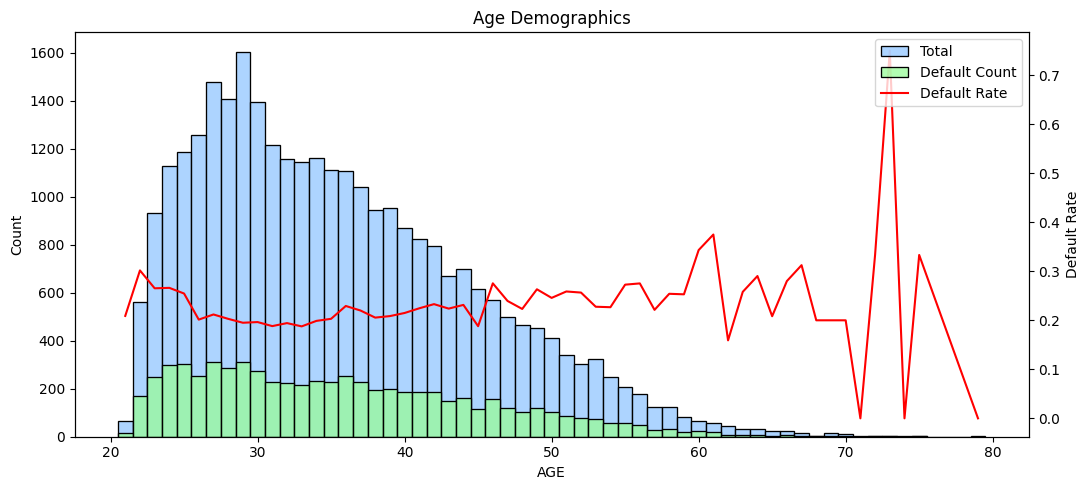

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111)

sns.histplot(df["AGE"], discrete=True, label="Total", ax=ax)
defaults_by_age = df["AGE"][y == 1]
sns.histplot(defaults_by_age, color="palegreen", discrete=True, label="Default Count", ax=ax)

ax2 = ax.twinx()

relative_defaults_by_age = (y.groupby(df["AGE"]).sum().sort_index() / df["AGE"].value_counts(sort=False).sort_index()) 
ax2.plot(relative_defaults_by_age, color="red", label="Default Rate")
ax2.grid(False)
ax2.set_ylabel("Default Rate")

plt.title("Age Demographics", fontsize=12)

l1, label1 = ax.get_legend_handles_labels()
l2, label2 = ax2.get_legend_handles_labels()
ax2.legend(l1[1:] + l2, label1[1:] + label2, loc=1)

    
plt.tight_layout()
plt.show()

### Analysis of age demographics

   * We see the distribution of the ages in the dataset is right skewed with a mode of 28 years old
   * The default rate on young adults (age range between 20 and 25) is relatively high compared to older demographic groups.
   * From the the default rate curve, **we see that the demographic in the late 20s and early 30s are the clients that are least likely to default**
   * The default rate curve becomes erratic on ages 60 and above, this could be attributed to the fewer number of samples
   * This graph provides insight on the probability of defaults based on age but this information may not be probably used all by itselt due to ethical concerns about age discrimination

   
    

0       14
1    10585
2    14030
3     4917
4      123
5      280
6       51
Name: EDUCATION, dtype: int64

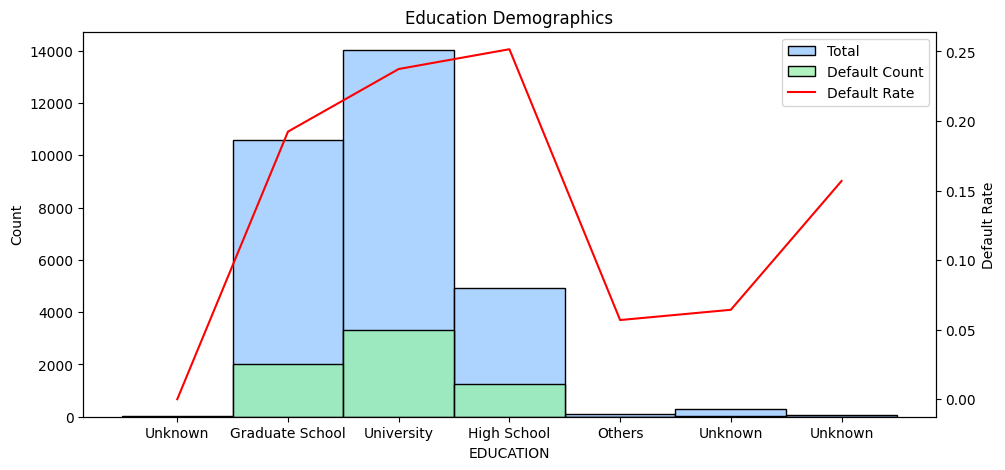

In [6]:
edu_ = df["EDUCATION"].copy()
defaults_by_edu = edu_[y == 1]

fig = plt.figure()
ax = fig.add_subplot(111)

sns.histplot(edu_, discrete=True, label="Total", ax=ax)
sns.histplot(defaults_by_edu, discrete=True, label="Default Count", ax=ax)

ax2 = ax.twinx()

relative_defaults_by_edu = y.groupby(edu_).sum().sort_index() / edu_.value_counts().sort_index()
ax2.plot(relative_defaults_by_edu, color="red", label="Default Rate")
ax2.set_ylabel("Default Rate")

l1, legends1 = ax.get_legend_handles_labels()
l2, legends2 = ax2.get_legend_handles_labels()

ax2.legend(l1[1::2] + l2, legends1[1::2] + legends2, loc=1)

education_brackets = ["Unknown", "Graduate School", "University", "High School", "Others", "Unknown", "Unknown"]
plt.xticks(np.arange(7), education_brackets)

plt.title("Education Demographics")
display(edu_.value_counts(sort=False).sort_index())

### Educational Attainment Demographics
  * We immediately see that we have some problem with the educational attainment series, we have 4 out of 6 categories to be unknown. But it should not really matter that much since their total count only comprises a small percentage of the total count of the clients
  
  * We see that, out of the three major educational attainment categories, **the clients with high school as their highest educational attainment are the most likely to default, they are followed by the university graduates, then the clients with graduate level education are the least likely to default**

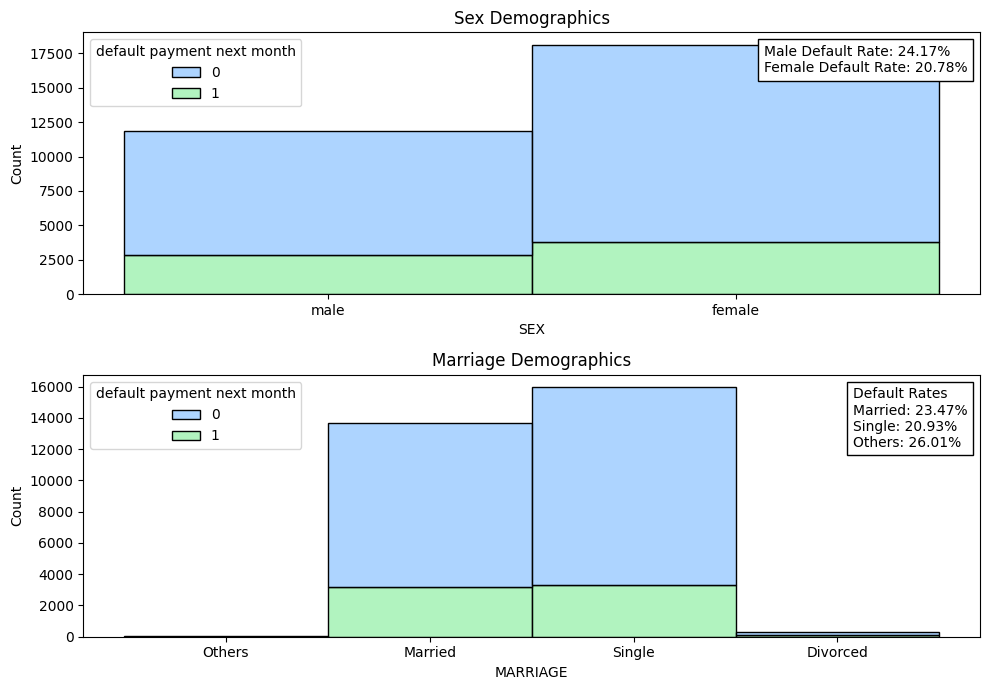

In [7]:
from matplotlib.offsetbox import AnchoredText

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,7))
sex_ = df["SEX"].value_counts()
sex_defaults = y.groupby(df["SEX"]).sum()
sex_default_rate = round(((sex_defaults / sex_) * 100), 2)


#sns.barplot(x=sex_.index, y=sex_, ax=ax[0])
sns.histplot(x=df["SEX"], ax=ax[0], hue=y, discrete=True, multiple="stack")
ax[0].set_xticks([1, 2],["male", "female"])
ax[0].set_title("Sex Demographics")

at = AnchoredText("Male Default Rate: {}% \nFemale Default Rate: {}%".format(sex_default_rate.iloc[0], sex_default_rate.iloc[1]),
                 loc="upper right", frameon=True)

ax[0].add_artist(at)

marriage_ = df["MARRIAGE"].value_counts().sort_index()
defaults_by_marriage = y.groupby(df["MARRIAGE"]).sum().sort_index()
marriage_default_rate = round((defaults_by_marriage / marriage_) * 100, 2)

sns.histplot(x=df["MARRIAGE"], ax=ax[1], hue=y, discrete=True, multiple="stack")

sns.move_legend(ax[1], "upper left")
ax[1].set_xticks(np.arange(4), ["Others", "Married", "Single", "Divorced"])
at2 = AnchoredText("Default Rates\nMarried: {}%\nSingle: {}%\nOthers: {}%".format(marriage_default_rate[1], marriage_default_rate[2], marriage_default_rate[3]),
                  loc="upper right")

ax[1].add_artist(at2)
ax[1].set_title("Marriage Demographics")

plt.tight_layout()

### Sex Demographics

We see that there are more females than males in the dataset, but we also see that males will have a higher chance of defaulting compared to their female counterparts.

### Marriage Demographics

The two main classes in the marriage demographics are the married and single categories. We see that married clients are the class that is more likely to default on their credit card.<br>


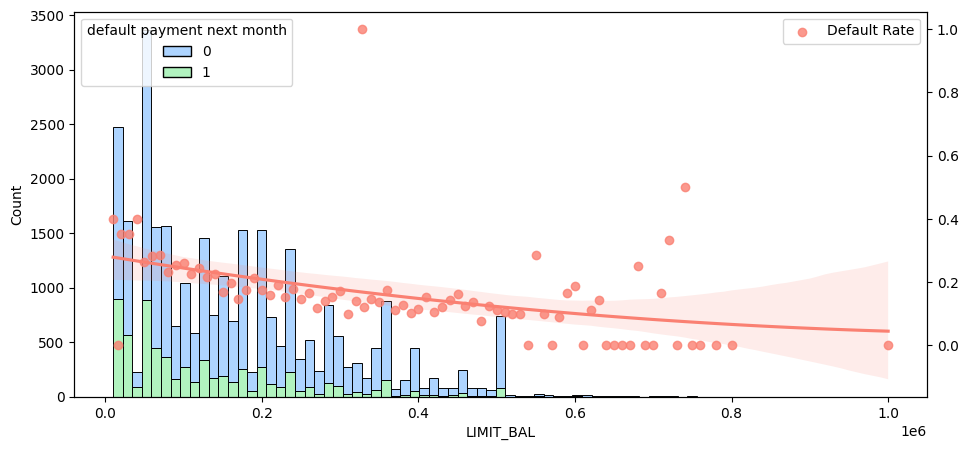

In [8]:
limit_bals = df["LIMIT_BAL"]
limit_bals_counts = limit_bals.value_counts().sort_index()
defaults_by_bals = y.groupby(limit_bals).sum().sort_index()
default_rate_by_bals = defaults_by_bals / limit_bals_counts
ax = sns.histplot(x=limit_bals, hue=y, multiple="stack")
sns.move_legend(ax, loc="upper left")

ax2 = ax.twinx()
sns.regplot(x=default_rate_by_bals.index, y=default_rate_by_bals, ax=ax2, order=2, color="salmon", label="Default Rate")
ax2.legend(loc="upper right")

### Balance Limits
We see that the majority of the clients have a balance limit of below 500K and that clients with higher balance limits are less likely to default than their counterparts with lower limits. 

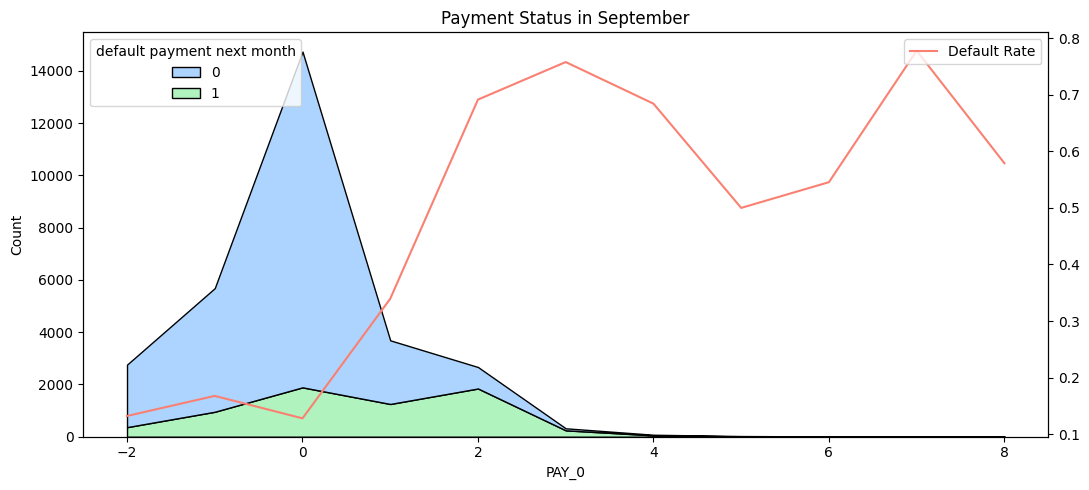

In [9]:
pay_ = df[["PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6"]]

ax = sns.histplot(x=pay_["PAY_0"], discrete=True, element="poly", label="Payment status in September", hue=y, multiple="stack")
ax.set_title("Payment Status in September")
sns.move_legend(ax, "upper left")

ax2 = ax.twinx()

pay_0 = pay_["PAY_0"].value_counts().sort_index()
default_by_pay0 = y.groupby(df["PAY_0"]).sum().sort_index()
default_rate_by_pay0 = default_by_pay0 / pay_0

ax2.plot(default_rate_by_pay0, color="salmon", label="Default Rate")
ax2.legend(loc="upper right")

plt.tight_layout()

### Payment data
  * -2 &rarr; No balance
  * -1 &rarr; Pays in full
  *  0 &rarr; Paid minimum amount due
  *  1 &rarr; 1 month delay
  *  2...8 &rarr; 2...8 months delay


We see that there is a rapid increase in the default rates of the clients once they have a delay of payment of at least one month.  <br>


### BILL_AMT

(0.0, 250000.0)

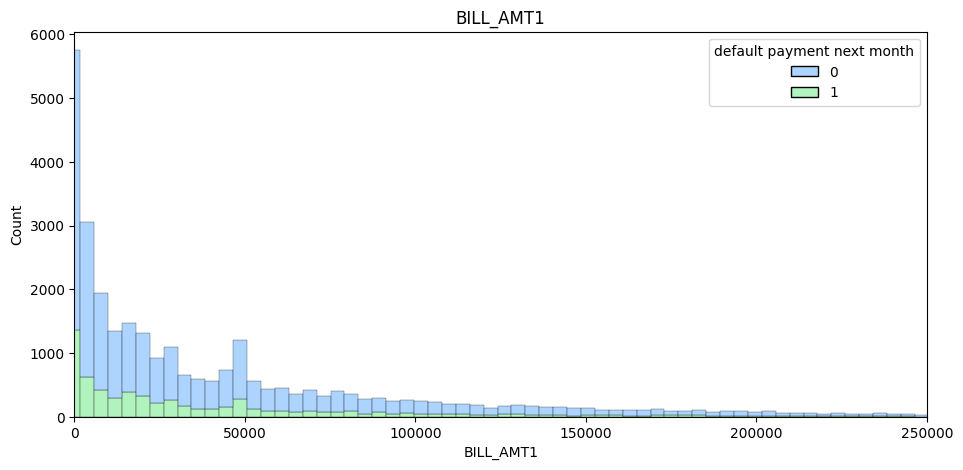

In [141]:
ax1 = sns.histplot(x=df.BILL_AMT1, hue=y, multiple="stack")
plt.title("BILL_AMT1")
plt.xlim(0, 250000)

We see that the bill_amt1 variable somewhat follows an exponential distribution. We see that the proportion of defaults for each bin somewhat remains constant .

### PAY_AMT

(0.0, 25000.0)

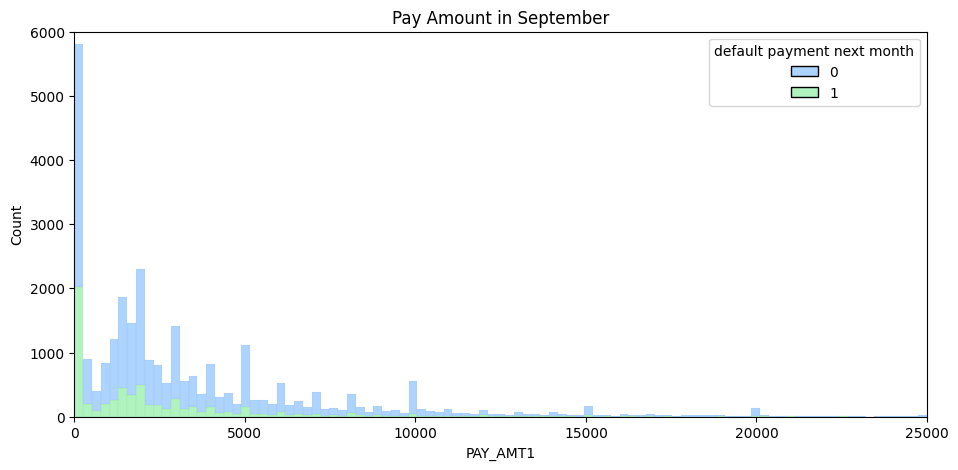

In [43]:
sns.histplot(data=df, x="PAY_AMT1", hue=y, multiple="stack")
plt.title("Pay Amount in September")
plt.ylim(0, 6000)
plt.xlim(0, 25000)

A significant portion of the clients that did not pay in september defaulted, as expected. We see that the distribution has a mean around 2000 to 2500 and is skewed to the right.

## Modelling Using CatBoost

In [10]:
X = df.copy()

num_feats = ["LIMIT_BAL", "BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6",
            "PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6", "AGE"]
cat_feats = ["SEX", "EDUCATION", "MARRIAGE"]

X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
2,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
3,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
4,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
5,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2)

In [12]:
from catboost import CatBoostClassifier, Pool

train_data = Pool(X_train, y_train)
catboost1 = CatBoostClassifier(iterations=100, verbose=False)
catboost1.fit(train_data)
preds= catboost1.predict(X_train)

In [13]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

score = cross_val_score(catboost1, X_train, y_train, cv=5)
print("Accuracy score: ", score.mean())

Accuracy score:  0.8183333333333334


In [14]:
# Create printing and helper functions

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

def print_conf(y_true, y_pred, ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(5, 3))
        
    conf = confusion_matrix(y_true, y_pred)
    
    sns.heatmap(conf, annot=True, ax=ax, cbar=False)
    plt.tight_layout()
    
    return ax

def get_precision_recall(y_true, y_pred, ax=None):
    metrics_score = precision_recall_fscore_support(y_true, y_pred, average="binary")
                            
    return metrics_score
    
def get_roc_auc(y_true, y_probas, ax=None):
    score = roc_auc_score(y_true, y_probas)
     
    return score


#Todo add KDfold precision recall conf matrix
def cross_val_test(X, y, model, folds=5):
    
    if isinstance(X, pd.DataFrame):
        X = X.to_numpy()
    if isinstance(y, pd.Series):
        y = y.to_numpy()
        
    kfold = KFold(n_splits=folds, shuffle=True)
    
    fig, ax = plt.subplots(nrows=2, ncols=3)
    
    metrics_df = pd.DataFrame()
    
    for i, (train, test) in enumerate(kfold.split(X)):
        
        X_train, X_test, y_train, y_test = X[train, :], X[test, :], y[train], y[test] 
        
        model.fit(X_train, y_train)
        y_preds = model.predict(X_test)
        
        print_conf(y_test, y_preds, ax=ax[int(i/3)][i % 3])
        
        accuracy = accuracy_score(y_test, y_preds)
        metrics = get_precision_recall(y_test, y_preds)
        roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
        
        metrics_df["fold_{}".format(i)] = np.append(metrics[:-1], [accuracy, roc_auc])
    
    metrics_df.index = ["precision", "recall", "f1_score", "Accuracy", "ROC_AUC"] 
    
    metrics_df["Average"] = metrics_df.mean(axis=1)
    display(metrics_df)

,fold_0,fold_1,fold_2,fold_3,fold_4,Average
precision,0.659609,0.653137,0.685864,0.649266,0.650160,0.659607
recall,0.392823,0.327172,0.370405,0.369202,0.385052,0.368931
f1_score,0.492401,0.435961,0.481028,0.470727,0.483660,0.472755
Accuracy,0.826042,0.809167,0.823333,0.813542,0.818958,0.818208
ROC_AUC,0.796999,0.760214,0.772168,0.771110,0.767952,0.773688


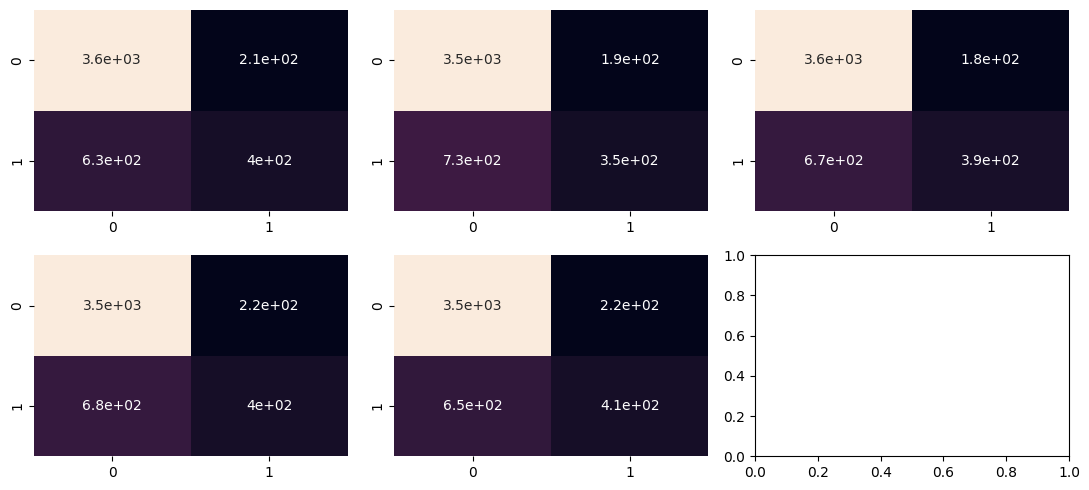

In [15]:
cross_val_test(X_train, y_train, catboost1)

Our accuracy is around 81.8%, better than a baseline model that predicts 0 all the time, which would have an accuracy of 78%. The precision is decent but the recall at 37% is not that good.

In [16]:
feat_importance = pd.Series(catboost1.get_feature_importance(), index=X_train.columns)
feat_importance.sort_values(ascending=False)

PAY_0        10.896851
LIMIT_BAL     8.034910
BILL_AMT1     6.351719
AGE           6.114605
PAY_AMT3      6.061794
PAY_AMT6      5.947689
PAY_AMT1      5.860928
PAY_AMT2      5.331488
BILL_AMT2     5.120776
PAY_AMT4      4.929364
BILL_AMT6     4.487568
PAY_AMT5      4.181117
PAY_2         4.011010
BILL_AMT5     3.987468
EDUCATION     2.866104
BILL_AMT3     2.741750
PAY_3         2.454551
BILL_AMT4     2.389720
PAY_4         2.158250
PAY_5         1.819773
MARRIAGE      1.753077
PAY_6         1.498155
SEX           1.001334
dtype: float64

The most important features, according to the SHAP values returned by the the catboost model, are the PAY_0, LIMIT_BAL, and BILL_AMT1. <br><br>
Lets try for perform a gridsearch to find better paramters.

In [19]:
model = CatBoostClassifier(verbose=False)

grid = {'learning_rate': [0.03, 0.1, 0.5],
        'depth': [4, 5, 6, 7],
        'l2_leaf_reg': [1, 3, 5, 7, 9],
        'iterations': [50, 75, 100, 150, 200] }

grid_search_result = model.grid_search(grid, 
                                       X=X_train, 
                                       y=y_train,
                                       search_by_train_test_split=False,
                                       cv=5,
                                       verbose=False)


Training on fold [0/5]

bestTest = 0.4465579426
bestIteration = 49

Training on fold [1/5]

bestTest = 0.4473822548
bestIteration = 49

Training on fold [2/5]

bestTest = 0.4405588684
bestIteration = 49

Training on fold [3/5]

bestTest = 0.44893415
bestIteration = 49

Training on fold [4/5]

bestTest = 0.4510452288
bestIteration = 49

Training on fold [0/5]

bestTest = 0.4283390737
bestIteration = 49

Training on fold [1/5]

bestTest = 0.4296073376
bestIteration = 48

Training on fold [2/5]

bestTest = 0.4204902992
bestIteration = 49

Training on fold [3/5]

bestTest = 0.4325697444
bestIteration = 49

Training on fold [4/5]

bestTest = 0.4348716965
bestIteration = 49

Training on fold [0/5]

bestTest = 0.4285744002
bestIteration = 20

Training on fold [1/5]

bestTest = 0.4296129187
bestIteration = 20

Training on fold [2/5]

bestTest = 0.4210010333
bestIteration = 25

Training on fold [3/5]

bestTest = 0.4329819262
bestIteration = 19

Training on fold [4/5]

bestTest = 0.4347412763
be


bestTest = 0.4371838399
bestIteration = 74

Training on fold [2/5]

bestTest = 0.4291100964
bestIteration = 74

Training on fold [3/5]

bestTest = 0.4395674754
bestIteration = 74

Training on fold [4/5]

bestTest = 0.4411237419
bestIteration = 74

Training on fold [0/5]

bestTest = 0.4264326056
bestIteration = 72

Training on fold [1/5]

bestTest = 0.4280509853
bestIteration = 74

Training on fold [2/5]

bestTest = 0.4193800212
bestIteration = 74

Training on fold [3/5]

bestTest = 0.4313717561
bestIteration = 74

Training on fold [4/5]

bestTest = 0.4336071972
bestIteration = 74

Training on fold [0/5]

bestTest = 0.4288422051
bestIteration = 20

Training on fold [1/5]

bestTest = 0.4281746711
bestIteration = 23

Training on fold [2/5]

bestTest = 0.4188065282
bestIteration = 21

Training on fold [3/5]

bestTest = 0.4348462721
bestIteration = 27

Training on fold [4/5]

bestTest = 0.4332310272
bestIteration = 26

Training on fold [0/5]

bestTest = 0.4354943941
bestIteration = 74

Tra


bestTest = 0.4219468462
bestIteration = 149

Training on fold [3/5]

bestTest = 0.4333201155
bestIteration = 149

Training on fold [4/5]

bestTest = 0.4348623818
bestIteration = 149

Training on fold [0/5]

bestTest = 0.4256597381
bestIteration = 140

Training on fold [1/5]

bestTest = 0.4270551522
bestIteration = 123

Training on fold [2/5]

bestTest = 0.4182710613
bestIteration = 149

Training on fold [3/5]

bestTest = 0.4306995572
bestIteration = 119

Training on fold [4/5]

bestTest = 0.4314628565
bestIteration = 140

Training on fold [0/5]

bestTest = 0.4294298725
bestIteration = 12

Training on fold [1/5]

bestTest = 0.4299510949
bestIteration = 21

Training on fold [2/5]

bestTest = 0.4199461016
bestIteration = 26

Training on fold [3/5]

bestTest = 0.433979062
bestIteration = 16

Training on fold [4/5]

bestTest = 0.4328759432
bestIteration = 19

Training on fold [0/5]

bestTest = 0.4288332036
bestIteration = 149

Training on fold [1/5]

bestTest = 0.4312673765
bestIteration =


bestTest = 0.4203649592
bestIteration = 199

Training on fold [3/5]

bestTest = 0.4317450323
bestIteration = 199

Training on fold [4/5]

bestTest = 0.4335598598
bestIteration = 199

Training on fold [0/5]

bestTest = 0.4245619993
bestIteration = 130

Training on fold [1/5]

bestTest = 0.4258288468
bestIteration = 163

Training on fold [2/5]

bestTest = 0.4175346039
bestIteration = 129

Training on fold [3/5]

bestTest = 0.4298162322
bestIteration = 114

Training on fold [4/5]

bestTest = 0.432055354
bestIteration = 164

Training on fold [0/5]

bestTest = 0.4266456593
bestIteration = 20

Training on fold [1/5]

bestTest = 0.4302472828
bestIteration = 17

Training on fold [2/5]

bestTest = 0.4208135351
bestIteration = 25

Training on fold [3/5]

bestTest = 0.4342466719
bestIteration = 22

Training on fold [4/5]

bestTest = 0.4355908164
bestIteration = 18

Training on fold [0/5]

bestTest = 0.4449506126
bestIteration = 49

Training on fold [1/5]

bestTest = 0.4455978877
bestIteration = 


bestTest = 0.4383076634
bestIteration = 74

Training on fold [4/5]

bestTest = 0.4394563468
bestIteration = 74

Training on fold [0/5]

bestTest = 0.4251813792
bestIteration = 73

Training on fold [1/5]

bestTest = 0.4268212393
bestIteration = 74

Training on fold [2/5]

bestTest = 0.4179020707
bestIteration = 73

Training on fold [3/5]

bestTest = 0.429900173
bestIteration = 74

Training on fold [4/5]

bestTest = 0.4320664808
bestIteration = 74

Training on fold [0/5]

bestTest = 0.4279533941
bestIteration = 13

Training on fold [1/5]

bestTest = 0.4310858796
bestIteration = 26

Training on fold [2/5]

bestTest = 0.4200757044
bestIteration = 18

Training on fold [3/5]

bestTest = 0.4356193015
bestIteration = 9

Training on fold [4/5]

bestTest = 0.4351105026
bestIteration = 16

Training on fold [0/5]

bestTest = 0.4348318512
bestIteration = 74

Training on fold [1/5]

bestTest = 0.4358778361
bestIteration = 74

Training on fold [2/5]

bestTest = 0.4267308387
bestIteration = 74

Train


bestTest = 0.4337431861
bestIteration = 149

Training on fold [0/5]

bestTest = 0.4262923806
bestIteration = 125

Training on fold [1/5]

bestTest = 0.4275426176
bestIteration = 93

Training on fold [2/5]

bestTest = 0.4160729076
bestIteration = 87

Training on fold [3/5]

bestTest = 0.4290639262
bestIteration = 114

Training on fold [4/5]

bestTest = 0.4314305718
bestIteration = 107

Training on fold [0/5]

bestTest = 0.4308821632
bestIteration = 8

Training on fold [1/5]

bestTest = 0.4326994769
bestIteration = 11

Training on fold [2/5]

bestTest = 0.4196341681
bestIteration = 16

Training on fold [3/5]

bestTest = 0.4346704671
bestIteration = 13

Training on fold [4/5]

bestTest = 0.4363361965
bestIteration = 23

Training on fold [0/5]

bestTest = 0.426998899
bestIteration = 149

Training on fold [1/5]

bestTest = 0.4294542355
bestIteration = 149

Training on fold [2/5]

bestTest = 0.4199506967
bestIteration = 149

Training on fold [3/5]

bestTest = 0.4319633637
bestIteration = 14


bestTest = 0.4328549541
bestIteration = 199

Training on fold [0/5]

bestTest = 0.4243753236
bestIteration = 109

Training on fold [1/5]

bestTest = 0.4241622541
bestIteration = 142

Training on fold [2/5]

bestTest = 0.4169128028
bestIteration = 116

Training on fold [3/5]

bestTest = 0.4298981218
bestIteration = 97

Training on fold [4/5]

bestTest = 0.4309922489
bestIteration = 139

Training on fold [0/5]

bestTest = 0.4278470907
bestIteration = 11

Training on fold [1/5]

bestTest = 0.4308129845
bestIteration = 10

Training on fold [2/5]

bestTest = 0.4195518203
bestIteration = 20

Training on fold [3/5]

bestTest = 0.435011594
bestIteration = 14

Training on fold [4/5]

bestTest = 0.4356536592
bestIteration = 13

Training on fold [0/5]

bestTest = 0.4257582724
bestIteration = 197

Training on fold [1/5]

bestTest = 0.4288460174
bestIteration = 199

Training on fold [2/5]

bestTest = 0.4182877809
bestIteration = 199

Training on fold [3/5]

bestTest = 0.4306796729
bestIteration = 


bestTest = 0.4259671423
bestIteration = 73

Training on fold [1/5]

bestTest = 0.4265490519
bestIteration = 73

Training on fold [2/5]

bestTest = 0.4163268681
bestIteration = 74

Training on fold [3/5]

bestTest = 0.4298449196
bestIteration = 73

Training on fold [4/5]

bestTest = 0.4314485277
bestIteration = 48

Training on fold [0/5]

bestTest = 0.4289283344
bestIteration = 18

Training on fold [1/5]

bestTest = 0.4280636603
bestIteration = 9

Training on fold [2/5]

bestTest = 0.4172692188
bestIteration = 10

Training on fold [3/5]

bestTest = 0.4333840531
bestIteration = 14

Training on fold [4/5]

bestTest = 0.4363708676
bestIteration = 9

Training on fold [0/5]

bestTest = 0.4333406173
bestIteration = 74

Training on fold [1/5]

bestTest = 0.4345868802
bestIteration = 74

Training on fold [2/5]

bestTest = 0.4260886159
bestIteration = 74

Training on fold [3/5]

bestTest = 0.4368267625
bestIteration = 74

Training on fold [4/5]

bestTest = 0.4382467607
bestIteration = 74

Train


bestTest = 0.4251911443
bestIteration = 94

Training on fold [2/5]

bestTest = 0.4162911355
bestIteration = 97

Training on fold [3/5]

bestTest = 0.4295751394
bestIteration = 97

Training on fold [4/5]

bestTest = 0.4303918496
bestIteration = 99

Training on fold [0/5]

bestTest = 0.4294110741
bestIteration = 13

Training on fold [1/5]

bestTest = 0.4282158361
bestIteration = 17

Training on fold [2/5]

bestTest = 0.4180985704
bestIteration = 11

Training on fold [3/5]

bestTest = 0.4338045579
bestIteration = 10

Training on fold [4/5]

bestTest = 0.435647015
bestIteration = 8

Training on fold [0/5]

bestTest = 0.426426761
bestIteration = 149

Training on fold [1/5]

bestTest = 0.4282710714
bestIteration = 149

Training on fold [2/5]

bestTest = 0.418723473
bestIteration = 149

Training on fold [3/5]

bestTest = 0.4306851008
bestIteration = 149

Training on fold [4/5]

bestTest = 0.4327733435
bestIteration = 148

Training on fold [0/5]

bestTest = 0.4258854307
bestIteration = 81

Tr


bestTest = 0.4154833132
bestIteration = 127

Training on fold [3/5]

bestTest = 0.4297134092
bestIteration = 112

Training on fold [4/5]

bestTest = 0.4304861451
bestIteration = 100

Training on fold [0/5]

bestTest = 0.4288744182
bestIteration = 8

Training on fold [1/5]

bestTest = 0.429225336
bestIteration = 10

Training on fold [2/5]

bestTest = 0.4180143269
bestIteration = 17

Training on fold [3/5]

bestTest = 0.4348618463
bestIteration = 7

Training on fold [4/5]

bestTest = 0.4359892601
bestIteration = 12

Training on fold [0/5]

bestTest = 0.4258054759
bestIteration = 199

Training on fold [1/5]

bestTest = 0.4269188195
bestIteration = 199

Training on fold [2/5]

bestTest = 0.4177259003
bestIteration = 199

Training on fold [3/5]

bestTest = 0.4298908654
bestIteration = 197

Training on fold [4/5]

bestTest = 0.4319532806
bestIteration = 197

Training on fold [0/5]

bestTest = 0.4263753729
bestIteration = 99

Training on fold [1/5]

bestTest = 0.4243433381
bestIteration = 11


bestTest = 0.4308044613
bestIteration = 70

Training on fold [4/5]

bestTest = 0.4324696403
bestIteration = 64

Training on fold [0/5]

bestTest = 0.430624436
bestIteration = 9

Training on fold [1/5]

bestTest = 0.4307953097
bestIteration = 7

Training on fold [2/5]

bestTest = 0.4198867519
bestIteration = 10

Training on fold [3/5]

bestTest = 0.4346336367
bestIteration = 7

Training on fold [4/5]

bestTest = 0.4389409335
bestIteration = 9

Training on fold [0/5]

bestTest = 0.4320547733
bestIteration = 74

Training on fold [1/5]

bestTest = 0.4337871369
bestIteration = 74

Training on fold [2/5]

bestTest = 0.4254062709
bestIteration = 74

Training on fold [3/5]

bestTest = 0.4363795462
bestIteration = 74

Training on fold [4/5]

bestTest = 0.4374698499
bestIteration = 74

Training on fold [0/5]

bestTest = 0.426349079
bestIteration = 55

Training on fold [1/5]

bestTest = 0.4261612792
bestIteration = 61

Training on fold [2/5]

bestTest = 0.4154522413
bestIteration = 72

Training 


bestTest = 0.4294095506
bestIteration = 13

Training on fold [1/5]

bestTest = 0.4281057325
bestIteration = 10

Training on fold [2/5]

bestTest = 0.4201640922
bestIteration = 11

Training on fold [3/5]

bestTest = 0.4352826582
bestIteration = 4

Training on fold [4/5]

bestTest = 0.4362230111
bestIteration = 9

Training on fold [0/5]

bestTest = 0.4288563631
bestIteration = 99

Training on fold [1/5]

bestTest = 0.4299916247
bestIteration = 99

Training on fold [2/5]

bestTest = 0.4207553076
bestIteration = 99

Training on fold [3/5]

bestTest = 0.4327765046
bestIteration = 99

Training on fold [4/5]

bestTest = 0.434477016
bestIteration = 99

Training on fold [0/5]

bestTest = 0.4252406077
bestIteration = 63

Training on fold [1/5]

bestTest = 0.4259874976
bestIteration = 99

Training on fold [2/5]

bestTest = 0.4159626167
bestIteration = 91

Training on fold [3/5]

bestTest = 0.4293347674
bestIteration = 72

Training on fold [4/5]

bestTest = 0.4306085417
bestIteration = 99

Traini


bestTest = 0.430874517
bestIteration = 13

Training on fold [2/5]

bestTest = 0.4193927893
bestIteration = 13

Training on fold [3/5]

bestTest = 0.4353503657
bestIteration = 4

Training on fold [4/5]

bestTest = 0.4378500086
bestIteration = 8

Training on fold [0/5]

bestTest = 0.4253279641
bestIteration = 199

Training on fold [1/5]

bestTest = 0.4270577074
bestIteration = 199

Training on fold [2/5]

bestTest = 0.417074338
bestIteration = 199

Training on fold [3/5]

bestTest = 0.4291673166
bestIteration = 197

Training on fold [4/5]

bestTest = 0.4318840285
bestIteration = 199

Training on fold [0/5]

bestTest = 0.4262617681
bestIteration = 50

Training on fold [1/5]

bestTest = 0.4264443258
bestIteration = 97

Training on fold [2/5]

bestTest = 0.4153749097
bestIteration = 68

Training on fold [3/5]

bestTest = 0.4285825833
bestIteration = 85

Training on fold [4/5]

bestTest = 0.4308860781
bestIteration = 110

Training on fold [0/5]

bestTest = 0.4305377149
bestIteration = 5

Tr

In [20]:
grid_search_result["params"]

{'depth': 7, 'l2_leaf_reg': 7, 'iterations': 100, 'learning_rate': 0.1}

In [21]:
model2 = CatBoostClassifier(depth=7,
                           l2_leaf_reg=7,
                           iterations=100,
                           learning_rate=0.1,
                           verbose=False)
model2.fit(train_data)
preds_2 = model2.predict(X_train)

In [22]:
score = cross_val_score(model2, X_train, y_train, cv=5)
print("Accuracy score: ", score.mean())

Accuracy score:  0.8210833333333334


,fold_0,fold_1,fold_2,fold_3,fold_4,Average
precision,0.674024,0.667791,0.682759,0.663603,0.693467,0.676329
recall,0.370336,0.374291,0.375000,0.342180,0.387640,0.369889
f1_score,0.478025,0.479709,0.484108,0.451532,0.497297,0.478134
Accuracy,0.819375,0.821042,0.824167,0.817292,0.825625,0.821500
ROC_AUC,0.768596,0.794149,0.774959,0.781411,0.792036,0.782230


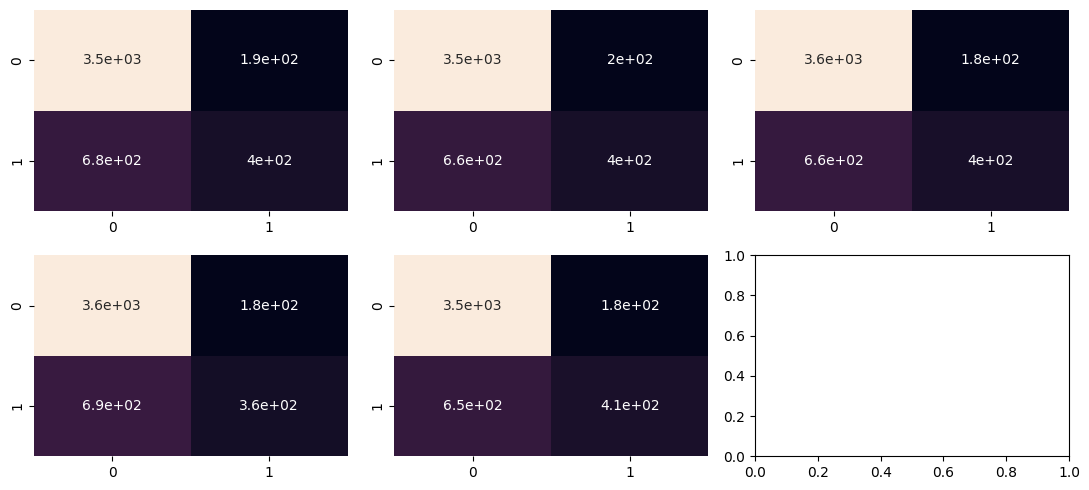

In [23]:
cross_val_test(X_train, y_train, model2)

Grid search improved our accuracy from 81.7% to 82.1%, which is not much but still an improvement. The precision is now at 67.6% whilst the recall is at 37%. This means that given that a sample is indeed going to default, the model will detect it 37% of the time. If our model predicts a sample is going to default, then 2/3 of the time the model is correct.

### Test Set Predictions

Text(0.5, 1.0, 'Confusion Matrix')

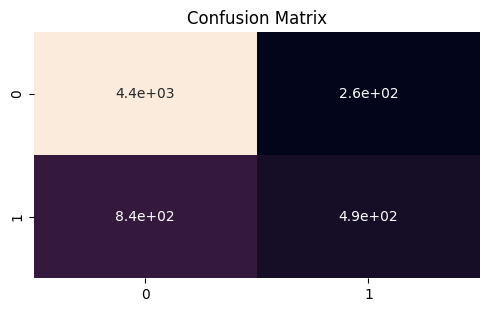

In [24]:
test_preds = model2.predict(X_test)
print_conf(y_test, test_preds)
plt.title("Confusion Matrix")

In [25]:
precision, recall, fscore, _ = get_precision_recall(y_test, test_preds)

print("Accuracy: ", (4400 + 470) / 6000)
print("Precision: ", precision)
print("Recall: ", recall)
print("Fscore: ", fscore)

Accuracy:  0.8116666666666666
Precision:  0.6532258064516129
Recall:  0.36623963828183875
Fscore:  0.4693384838242395


The performance on the test set is similar to what we've found on the cross-validation results. The accuracy is 81.17%. The precision and recall are 65.3% and 36.6% respectively.

In [31]:
feat_importance = pd.Series(model2.get_feature_importance(), index=X_train.columns)
feat_importance.sort_values(ascending=False)

PAY_0        19.709527
LIMIT_BAL     7.724914
BILL_AMT1     6.225224
PAY_AMT1      5.372690
PAY_2         4.943642
PAY_3         4.572858
PAY_AMT3      4.375259
PAY_AMT6      4.316488
AGE           3.627842
PAY_AMT2      3.558548
PAY_AMT4      3.307562
BILL_AMT5     3.254147
BILL_AMT2     3.239062
SEX           3.191427
EDUCATION     3.073394
BILL_AMT6     2.986431
PAY_AMT5      2.906516
PAY_4         2.886875
BILL_AMT3     2.843583
MARRIAGE      2.451583
PAY_5         2.309408
PAY_6         1.595552
BILL_AMT4     1.527466
dtype: float64

In [27]:
import shap

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [28]:
explainer = shap.TreeExplainer(model2)
shap_values = explainer.shap_values(X_test)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


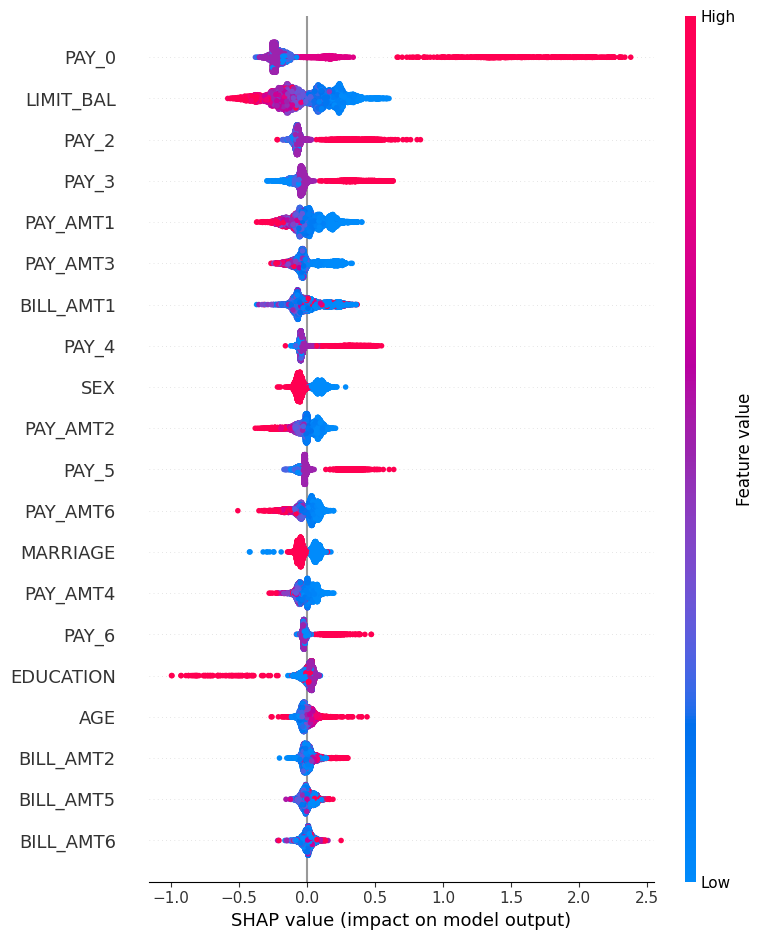

In [30]:
shap.summary_plot(shap_values, X_test)

#### Conlclusions based on the shap values
* PAY_0, PAY_2 ... PAY_6 - More delayed payments leads to a higher chance of defaulting.
* LIMIT_BAL - Clients with less credit are less likely to default.
* SEX - Males are more likely to default than females.
* AGE - The model also discriminates by age and puts a higher chance of default to older clients.
* PAY_AMT - Low amounts of previous payments yields to a higher chance of default rates
* Marriage - Married clients are more likely to default than their counterparts.

We see that the best predictors of default are the credit history of the client. In order to improve this model, we would have to include more details on the credit history of the borrower such as past loans and payment histories. We would probably have to remove the sex and age variables in order to prevent discrimination to certain groups of people, as we see in our model that it discriminates against males and the older demographics.

#### Variable definitions:

* ID: ID of each client
* LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
* SEX: Gender (1=male, 2=female)
* EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
* MARRIAGE: Marital status (1=married, 2=single, 3=others)
* AGE: Age in years
* PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
* PAY_2: Repayment status in August, 2005 (scale same as above)
* PAY_3: Repayment status in July, 2005 (scale same as above)
* PAY_4: Repayment status in June, 2005 (scale same as above)
* PAY_5: Repayment status in May, 2005 (scale same as above)
* PAY_6: Repayment status in April, 2005 (scale same as above)
* BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
* BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
* BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
* BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
* BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
* BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
* PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
* PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
* PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
* PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
* PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
* PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
